Monte Carlo simulations can be used to solve any probabilistic problem. Using the law of large numbers, we can approximate the results through empirical data we create. For every task, we create a PERT distribution using the given a (pessimistic), b (most likely) and c (optimistic) values and draw a value from that distribution. What we get is a simulated estimation for each task. When we add these estimations together we get the simulated estimation of the whole project.


PERT distribution is a transformed four parameter beta distribution. to use the PERT distribution we need to convert a, b and c to α and β

$\alpha$ = $\frac{4b+c-5a}{c-a}$

$\beta$ = $\frac{45c-a-4b}{c-a}$

[source](https://towardsdatascience.com/estimating-tasks-with-statistics-and-simulations-using-python-ddd1df3c7ce1)

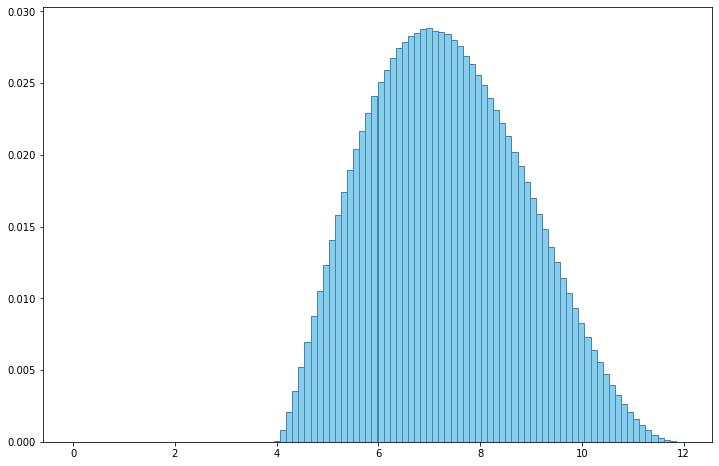

CPU times: user 3.58 s, sys: 245 ms, total: 3.83 s
Wall time: 3.85 s


In [1]:
%%time
import numpy as np
import pandas as pd
import math  
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import stats

no_of_experiments = 10000000
num_bins = 100
# 4 is optimistic, 7 is likely and 12 is pessimistic
tasks = {
    "Task 1": [4,7, 12],
}

data = pd.DataFrame(tasks, index=["optimistic", "likely", 
                                  "pessimistic"])
points = [0] * no_of_experiments

for column in data:
    a, b, c = data[column][0], data[column][1], data[column][2]
    alpha = ((4*b) + c - (5*a))/(c - a)
    beta = ((5*c) - a - (4*b))/(c - a)
    r = np.random.beta(alpha, beta, no_of_experiments)
    p = (r*(c-a)) + a
    points += p

plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(points, num_bins, 
                            range = (0, np.max(points)),
                            color = "skyblue", lw=1, 
                            edgecolor="steelblue", 
                            weights=[1/no_of_experiments]*
                            no_of_experiments)
plt.show()

*What does it all mean??*

In [7]:
_, minmax, mean, var, skewness, kurtosis = stats.describe(points)
sd = math.sqrt(var)

print("Tasks")
print("-----")
data["Total"] = data.sum(axis=1).values
print(data.T)
print()

print("Statistics")
print("----------")
print("minimum:", "%.1f" % minmax[0], "maximum:", 
      "%.1f" % minmax[1])
print("mean:", "%.1f" %  mean)
print("standard deviation:", "%.1f" % sd)
print("skewness:", "%.2f" % skewness)
print("kurtosis:", "%.2f" % kurtosis)
print()

# prints out the probability
def print_probability(bins, mean, sd, experiments, fraction):
    upper = len(np.where(bins <= mean + sd)[0])
    lower = len(np.where(bins <= mean - sd)[0])
    prob = (np.sum(n[:upper])-np.sum(n[:lower]))*100
    print("* between", "%.1f" % (mean-sd/2), "and", 
          "%.1f" % (mean+sd/2), ":", "%.4f%%" % prob, 
          "(within %sσ)" % fraction)

print("Probabilities")
print("-------------")
print_probability(bins, mean, sd/2, no_of_experiments, "0.5")
print_probability(bins, mean, sd, no_of_experiments, "1")
print_probability(bins, mean, 2*sd, no_of_experiments, "2")
print_probability(bins, mean, 3*sd, no_of_experiments, "3")

Tasks
-----
        optimistic  likely  pessimistic
Task 1           4       7           12
Total           24      42           72

Statistics
----------
minimum: 4.0 maximum: 12.0
mean: 7.3
standard deviation: 1.5
skewness: 0.22
kurtosis: -0.60

Probabilities
-------------
* between 7.0 and 7.7 : 33.1171% (within 0.5σ)
* between 6.6 and 8.1 : 64.6645% (within 1σ)
* between 5.8 and 8.8 : 97.2377% (within 2σ)
* between 5.1 and 9.6 : 99.9993% (within 3σ)


The *skewness* is 0.22, which means the estimations tend to lean towards being more optimistic. If it’s a negative number it means it tends towards being more pessimistic. Skewness of a distribution that is symmetrical is 0.

The kurtosis is -0.6 indicates that the peak is a bit flat and more spread out. Generally speaking, the lower the number (the kurtosis of a normal distribution is 0) the flatter the curve is and the higher the number the more peaky it is. A flatter curve means the the optimistic and pessimistic values are further away from each other, and the the peaky curve means the optimistic and pessimistic values are closer to each other.

There is a 99.9994% chance that the task is somewhere between 5.1 and 9.6. Now compare that with the optimistic value of 4 and the pessimistic value of 12. It seems wrong that if you think the task is optimistically a 4 and pessimistically a 12 to then be told off by statistics that either values have a probability of only 0.0006%!

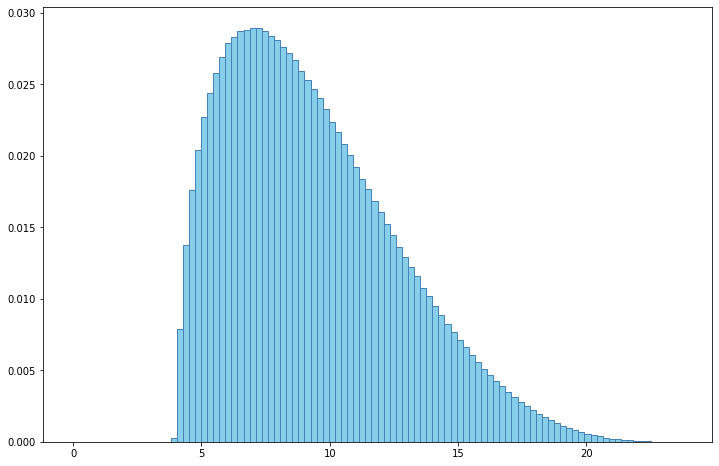

In [8]:
# lets try a diff pessimistic value
tasks = {
    "Task 1": [4,7, 24],
}

data = pd.DataFrame(tasks, index=["optimistic", "likely", 
                                  "pessimistic"])
points = [0] * no_of_experiments

for column in data:
    a, b, c = data[column][0], data[column][1], data[column][2]
    alpha = ((4*b) + c - (5*a))/(c - a)
    beta = ((5*c) - a - (4*b))/(c - a)
    r = np.random.beta(alpha, beta, no_of_experiments)
    p = (r*(c-a)) + a
    points += p

plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(points, num_bins, 
                            range = (0, np.max(points)),
                            color = "skyblue", lw=1, 
                            edgecolor="steelblue", 
                            weights=[1/no_of_experiments]*
                            no_of_experiments)
plt.show()

In [9]:
_, minmax, mean, var, skewness, kurtosis = stats.describe(points)
sd = math.sqrt(var)

print("Tasks")
print("-----")
data["Total"] = data.sum(axis=1).values
print(data.T)
print()

print("Statistics")
print("----------")
print("minimum:", "%.1f" % minmax[0], "maximum:", 
      "%.1f" % minmax[1])
print("mean:", "%.1f" %  mean)
print("standard deviation:", "%.1f" % sd)
print("skewness:", "%.2f" % skewness)
print("kurtosis:", "%.2f" % kurtosis)
print()

print("Probabilities")
print("-------------")
print_probability(bins, mean, sd/2, no_of_experiments, "0.5")
print_probability(bins, mean, sd, no_of_experiments, "1")
print_probability(bins, mean, 2*sd, no_of_experiments, "2")
print_probability(bins, mean, 3*sd, no_of_experiments, "3")

Tasks
-----
        optimistic  likely  pessimistic
Task 1           4       7           24
Total            4       7           24

Statistics
----------
minimum: 4.0 maximum: 23.7
mean: 9.3
standard deviation: 3.3
skewness: 0.70
kurtosis: -0.01

Probabilities
-------------
* between 8.5 and 10.2 : 33.7094% (within 0.5σ)
* between 7.7 and 11.0 : 65.0417% (within 1σ)
* between 6.0 and 12.7 : 96.0501% (within 2σ)
* between 4.3 and 14.3 : 99.6024% (within 3σ)


### Estimating multiple tasks
What we did before is just warming up. What we really want is to estimate multiple tasks. While we can more or less calculate the values for a single task due to the PERT distribution, it’s going to be pretty hairy to do so if you have 100 tasks for example.


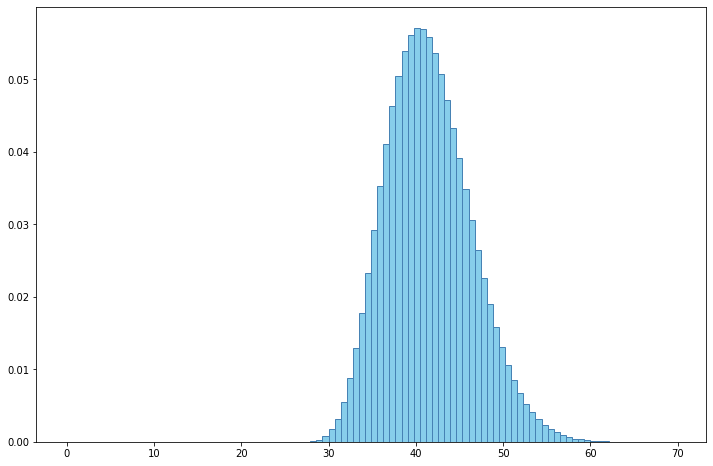

In [10]:
tasks = {
    "Task 1": [4,7, 12],
    "Task 2": [2, 3, 9],
    "Task 3": [3, 5, 16],
    "Task 4": [6, 7, 23],
    "Task 5": [10, 12, 28],
}

data = pd.DataFrame(tasks, index=["optimistic", "likely", 
                                  "pessimistic"])
points = [0] * no_of_experiments

for column in data:
    a, b, c = data[column][0], data[column][1], data[column][2]
    alpha = ((4*b) + c - (5*a))/(c - a)
    beta = ((5*c) - a - (4*b))/(c - a)
    r = np.random.beta(alpha, beta, no_of_experiments)
    p = (r*(c-a)) + a
    points += p

plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(points, num_bins, 
                            range = (0, np.max(points)),
                            color = "skyblue", lw=1, 
                            edgecolor="steelblue", 
                            weights=[1/no_of_experiments]*
                            no_of_experiments)
plt.show()

In [11]:
# assuming all tasks are independent! not dependent on each other
_, minmax, mean, var, skewness, kurtosis = stats.describe(points)
sd = math.sqrt(var)

print("Tasks")
print("-----")
data["Total"] = data.sum(axis=1).values
print(data.T)
print()

print("Statistics")
print("----------")
print("minimum:", "%.1f" % minmax[0], "maximum:", 
      "%.1f" % minmax[1])
print("mean:", "%.1f" %  mean)
print("standard deviation:", "%.1f" % sd)
print("skewness:", "%.2f" % skewness)
print("kurtosis:", "%.2f" % kurtosis)
print()

print("Probabilities")
print("-------------")
print_probability(bins, mean, sd/2, no_of_experiments, "0.5")
print_probability(bins, mean, sd, no_of_experiments, "1")
print_probability(bins, mean, 2*sd, no_of_experiments, "2")
print_probability(bins, mean, 3*sd, no_of_experiments, "3")


Tasks
-----
        optimistic  likely  pessimistic
Task 1           4       7           12
Task 2           2       3            9
Task 3           3       5           16
Task 4           6       7           23
Task 5          10      12           28
Total           25      34           88

Statistics
----------
minimum: 26.5 maximum: 69.8
mean: 41.5
standard deviation: 4.9
skewness: 0.40
kurtosis: 0.06

Probabilities
-------------
* between 40.3 and 42.7 : 32.1378% (within 0.5σ)
* between 39.1 and 43.9 : 67.6008% (within 1σ)
* between 36.6 and 46.3 : 96.0668% (within 2σ)
* between 34.2 and 48.8 : 99.6949% (within 3σ)


So logically for the project, the task estimation should be a total of the optimistic, likely and pessimistic columns. As a project collectively we see the optimistic total is 25, the most likely total is 34 and the pessimistic total is 88. But how accurate is it? Let’s dig deeper.

From the numbers, we see that the mean 41.5 is pretty far away from the most likely value, and the mean is actually the most likely value for this distribution! This means by adding up the most likely values, we end up having a more optimistic view that the numbers show.
The minimum is only slightly more than than the optimistic value while the maximum is quite a bit less than the pessimistic value. Again this means by adding up the pessimistic values, we are really being too pessimistic while we are only slightly more optimistic than the numbers show.
The skewness of the distribution is quite positive so the over project tends to be more optimistic while the kurtosis is slightly positive (actually it’s pretty close to 0) so the project is quite well balanced in terms of the range between the optimistic and pessimistic values.